# Simple Moving Average

Examples of working with the simple moving average calculation

In [1]:
# get the data
!wget -nc https://lazyprogrammer.me/course_files/sp500_close.csv

File ‘sp500_close.csv’ already there; not retrieving.



In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# read in the data
close = pd.read_csv('sp500_close.csv', index_col=0, parse_dates=True)

In [4]:
close.head()

,AAL,AAPL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,...,XLNX,XL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
2013-02-08,14.75,67.8542,78.90,36.25,46.89,34.41,73.31,39.12,45.70,30.22,...,37.51,28.24,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-11,14.46,68.5614,78.39,35.85,46.76,34.26,73.07,38.64,46.08,30.28,...,37.46,28.31,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,14.27,66.8428,78.60,35.42,46.96,34.30,73.37,38.89,46.27,30.81,...,37.58,28.41,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74


In [5]:
# let's use the google data
goog = close[['GOOG']].copy().dropna()

In [6]:
goog.head()

,GOOG
2014-03-27,558.46
2014-03-28,559.99
2014-03-31,556.97
2014-04-01,567.16
2014-04-02,567.00


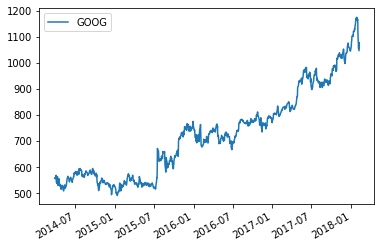

In [7]:
goog.plot();

In [8]:
# calc the log returns for google
goog_ret = np.log(goog.pct_change(1) + 1)

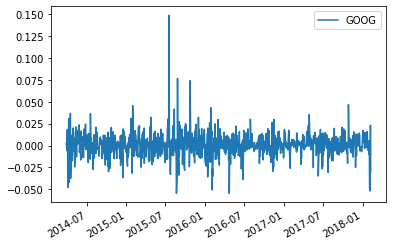

In [9]:
goog_ret.plot();

In [10]:
# calc the simple moving average using rolling and using a window size of 10
goog['SMA-10'] = goog['GOOG'].rolling(10).mean()
goog.head(20)

,GOOG,SMA-10
2014-03-27,558.46,NaN
2014-03-28,559.99,NaN
2014-03-31,556.97,NaN
2014-04-01,567.16,NaN
2014-04-02,567.00,NaN
2014-04-03,569.74,NaN
2014-04-04,543.14,NaN
2014-04-07,538.15,NaN
2014-04-08,554.90,NaN
2014-04-09,564.14,557.965


Note that the first 9 values are `NaN`.

In [11]:
# look at what is returned by rolling
type(goog['GOOG'].rolling(10))

pandas.core.window.rolling.Rolling

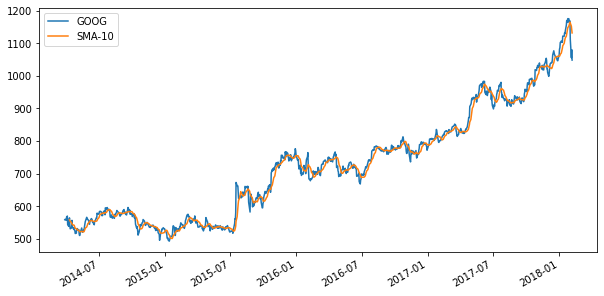

In [12]:
# replot and add simple moving average
goog.plot(figsize=(10,5));

In [13]:
# calc again with a different window size
goog['SMA-50'] = goog['GOOG'].rolling(50).mean()

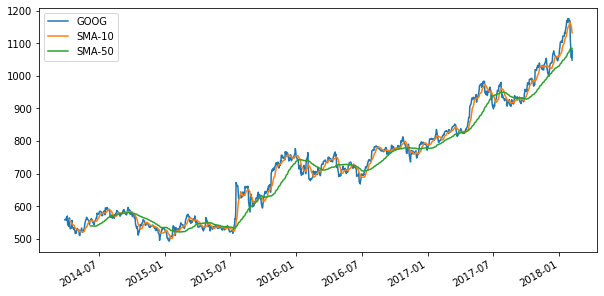

In [14]:
goog.plot(figsize=(10,5));

The more values used in the window, the smoother the curves. However, the lagging of the smoothed series becomes more pronounced the larger the window.

## Multivariate examples

In [15]:
# get dataframe of google and apple
goog_aapl = close[['GOOG', 'AAPL']].copy().dropna()
# calc covariances
cov = goog_aapl.rolling(50).cov()
cov

GOOG       AAPL
2014-03-27 GOOG          NaN        NaN
           AAPL          NaN        NaN
2014-03-28 GOOG          NaN        NaN
           AAPL          NaN        NaN
2014-03-31 GOOG          NaN        NaN
...                      ...        ...
2018-02-05 AAPL    34.825709  17.568865
2018-02-06 GOOG  2691.756465  38.174468
           AAPL    38.174468  19.121371
2018-02-07 GOOG  2678.778214  49.980378
           AAPL    49.980378  22.052882

[1950 rows x 2 columns]

In [16]:
# get a single covariance matrix
cov.loc['2018-02-07'].to_numpy()

array([[2678.77821424,   49.98037849],
       [  49.98037849,   22.05288249]])

In [17]:
# calc returns
goog_aapl_ret = np.log(1 + goog_aapl.pct_change(1))
goog_aapl_ret.head()

,GOOG,AAPL
2014-03-27,NaN,NaN
2014-03-28,0.002736,-0.001117
2014-03-31,-0.005408,-0.000223
2014-04-01,0.018130,0.009106
2014-04-02,-0.000282,0.001661


In [18]:
# calc simple moving averages
goog_aapl_ret['GOOG-SMA-50'] = goog_aapl_ret['GOOG'].rolling(50).mean()
goog_aapl_ret['AAPL-SMA-50'] = goog_aapl_ret['AAPL'].rolling(50).mean()

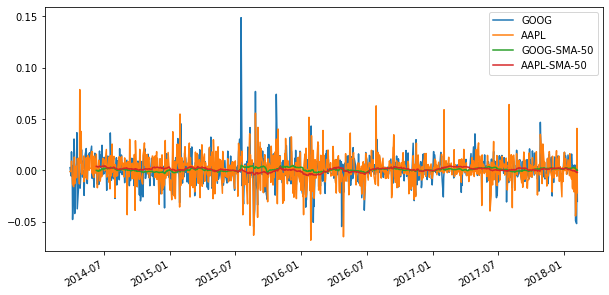

In [19]:
goog_aapl_ret.plot(figsize=(10,5));

In [20]:
# calc covariances
cov = goog_aapl_ret[['GOOG-SMA-50', 'AAPL-SMA-50']].rolling(50).cov()
cov.tail()

GOOG-SMA-50   AAPL-SMA-50
2018-02-05 AAPL-SMA-50 -7.715772e-08  1.188405e-06
2018-02-06 GOOG-SMA-50  2.852362e-07 -1.882949e-08
           AAPL-SMA-50 -1.882949e-08  1.329746e-06
2018-02-07 GOOG-SMA-50  3.430702e-07  8.238184e-08
           AAPL-SMA-50  8.238184e-08  1.506869e-06

In [21]:
# calc correlations
corr = goog_aapl_ret[['GOOG-SMA-50', 'AAPL-SMA-50']].rolling(50).corr()
corr.tail(16)

GOOG-SMA-50  AAPL-SMA-50
2018-01-29 GOOG-SMA-50     1.000000    -0.353417
           AAPL-SMA-50    -0.353417     1.000000
2018-01-30 GOOG-SMA-50     1.000000    -0.397767
           AAPL-SMA-50    -0.397767     1.000000
2018-01-31 GOOG-SMA-50     1.000000    -0.426551
           AAPL-SMA-50    -0.426551     1.000000
2018-02-01 GOOG-SMA-50     1.000000    -0.462629
           AAPL-SMA-50    -0.462629     1.000000
2018-02-02 GOOG-SMA-50     1.000000    -0.406629
           AAPL-SMA-50    -0.406629     1.000000
2018-02-05 GOOG-SMA-50     1.000000    -0.138433
           AAPL-SMA-50    -0.138433     1.000000
2018-02-06 GOOG-SMA-50     1.000000    -0.030574
           AAPL-SMA-50    -0.030574     1.000000
2018-02-07 GOOG-SMA-50     1.000000     0.114578
           AAPL-SMA-50     0.114578     1.000000